# WeatherPy
----

#### Observable Trends
----
The most obvious trend that we can see from the analysis is that as we move closer to the equator, the temperature tends to get hotter; this however is a relatively broad statement as we can also identify from the data that the hottest temperatures tend to not be the closest location(s) to the equator and generally between 20° and 40° from the equator we tend to see our hottest temperatures. 

Our linear regression plots, show for both Northern and Southern a very strong correlation in regards to Temperature vs Latitude, and we can also see from these plots that they are generally a reverse of one another, based on latitude. 

Surprisingly, there is little to no correlation in relation to humidity at differing latitudes. I would have expected to see a trend in regards to the relative humidity, similar to the correlation between latitude and temperature. 

Unsurprisingly, there is little to no correlation between wind speed or cloudiness at differing latitudes and I would not expect to see any trend or correlation between these.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from colorama import Fore
from colorama import Style
import datetime
x = datetime.datetime.now()

# Automatically set Data Frames to 2 decimal places
pd.options.display.precision = 2

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# print(x.strftime("%d""/""%m""/""%Y"))

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Specify the API URL and that we want to return the units of measurement to return the information in 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# cities = ["Perth", "Melbourne", "abcd", "Superman", "Karratha", "Brisbane"]

# Build partial query URL 
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Set up lists to hold response information 
temperature = []
latitude = []
longitude = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []

In [4]:
city_count = 1
total_cities = len(cities)
print("-----------------------------------")
print("Starting API Call - Retrieving Data")
print("-----------------------------------")

# Loop through the list of cities and perform a request for data on each city 
for city in cities:

# Call the API and if successful, append the information for each city into the relevant lists
    response = requests.get(query_url + city).json()
    
    print(f"Making request number: {city_count} of {total_cities} | {city}")
    
    try: 
        city_count = city_count + 1
        temperature.append(response["main"]["temp"])    
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response['sys']['country'])

# If unsuccessful, do not append and print below statement

    except(KeyError, IndexError):
        print(f"{Fore.RED}Request number {city_count-1}: {city} - Not found. Skipping....{Style.RESET_ALL}")
         
    
print("-----------------------------------")
print("Data Retrieval Finalised")
print("-----------------------------------")

-----------------------------------
Starting API Call - Retrieving Data
-----------------------------------
Making request number: 1 of 614 | ust-tsilma
Making request number: 2 of 614 | hithadhoo
Making request number: 3 of 614 | attawapiskat
Request number 3: attawapiskat - Not found. Skipping....
Making request number: 4 of 614 | busselton
Making request number: 5 of 614 | margate
Making request number: 6 of 614 | miranorte
Request number 6: miranorte - Not found. Skipping....
Making request number: 7 of 614 | rondonopolis
Making request number: 8 of 614 | nanga eboko
Making request number: 9 of 614 | tigil
Making request number: 10 of 614 | pisco
Making request number: 11 of 614 | chimbote
Making request number: 12 of 614 | clyde river
Making request number: 13 of 614 | dikson
Making request number: 14 of 614 | sitka
Making request number: 15 of 614 | jibuti
Making request number: 16 of 614 | klaksvik
Making request number: 17 of 614 | arman
Making request number: 18 of 614 | rikit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame to hold requested information
weather_df = pd.DataFrame({"City": city_name, "Country": country, "Temperature (f)": temperature, "Latitude": latitude, "Longitude": longitude, "Humidity (%)": humidity, "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
weather_df 

,City,Country,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ust-Tsilma,RU,56.37,65.44,52.15,70,100,8.72
1,Hithadhoo,MV,84.85,-0.60,73.08,70,85,6.91
2,Busselton,AU,55.20,-33.65,115.33,82,75,17.52
3,Margate,GB,65.66,51.38,1.39,64,93,3.00
4,Rondonópolis,BR,89.49,-16.47,-54.64,29,11,7.70
...,...,...,...,...,...,...,...,...
557,Nelson Bay,AU,52.48,-32.72,152.15,71,40,9.17
558,Puerto Carreño,CO,77.00,6.19,-67.49,88,20,5.82
559,Chegdomyn,RU,64.78,51.12,133.02,90,100,0.83
560,Necochea,AR,44.01,-38.55,-58.74,80,4,5.01


In [6]:
# Export to CSV
weather_df.to_csv("../output_data/temperature_file.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Find out if there are any values 100% of over for Humidity
weather_df.describe()

,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
count,562.00,562.00,562.00,562.00,562.00,562.00
mean,69.15,20.10,21.13,69.07,48.45,7.80
std,15.79,33.59,92.39,22.25,39.51,4.81
min,26.60,-54.80,-179.17,3.00,0.00,0.36
25%,57.25,-8.08,-61.18,58.00,4.00,4.00
50%,69.97,21.32,24.96,75.00,40.00,6.93
75%,80.72,50.24,108.08,86.00,90.00,10.29
max,115.56,78.22,179.32,100.00,100.00,27.16


The max value for Humidity is 100 meaning that we need to drop some values

In [8]:
# Drop any values that are 100% or over for Humidity.
humidity_drop = weather_df.loc[weather_df["Humidity (%)"]<100]
humidity_drop

# Sort data frame to obtain highest temp and city for the day
# sorted = humidity_drop.sort_values("Temperature (f)", ascending = False)
# sorted

,City,Country,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ust-Tsilma,RU,56.37,65.44,52.15,70,100,8.72
1,Hithadhoo,MV,84.85,-0.60,73.08,70,85,6.91
2,Busselton,AU,55.20,-33.65,115.33,82,75,17.52
3,Margate,GB,65.66,51.38,1.39,64,93,3.00
4,Rondonópolis,BR,89.49,-16.47,-54.64,29,11,7.70
...,...,...,...,...,...,...,...,...
557,Nelson Bay,AU,52.48,-32.72,152.15,71,40,9.17
558,Puerto Carreño,CO,77.00,6.19,-67.49,88,20,5.82
559,Chegdomyn,RU,64.78,51.12,133.02,90,100,0.83
560,Necochea,AR,44.01,-38.55,-58.74,80,4,5.01


In [9]:
# Export the City_Data into a csv
humidity_drop.to_csv("../output_data/humidity_drop.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

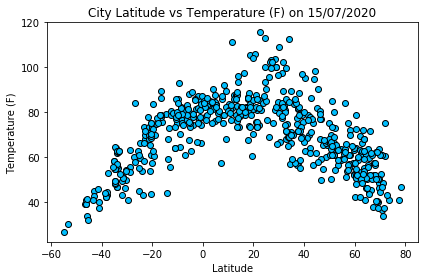

In [10]:
# Generate a scatter plot of latitude versus temperature
plt.scatter(humidity_drop["Latitude"], humidity_drop["Temperature (f)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Temperature (F) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Temperature_(F).png")
plt.show()

This code is written to produce a scatter plot showing City Latitude vs Temperature on any given day; with the day being shown in the title of the plot. This is automatically updated with the date the code is run. 

The plot above shows that as we get closer to the equator (0 degress latitude) the temperature gets hotter, however as we move slightly north, just above 20° in latitude, we do see our hottest temperature for the day which was 115.56 farenheit, located in Taoudenni, just north of the equator.

## Latitude vs. Humidity Plot

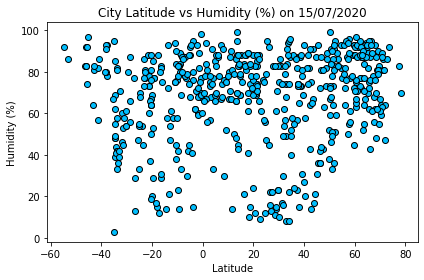

In [11]:
# Generate a scatter plot of latitude versus humidity

plt.scatter(humidity_drop["Latitude"], humidity_drop["Humidity (%)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Humidity (%) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Humidity_(%).png")
plt.show()

This code is written to produce a scatter plot showing City Latitude vs Humidity on any given day; with the day being shown in the title of the plot. This is automatically updated with the date the code is run. 

The plot above shows no real correlation in regards to latitude and humidity for each city; but we can see there are some clusters of data points as we move through from 60-100% humidity right across all locations.

## Latitude vs. Cloudiness Plot

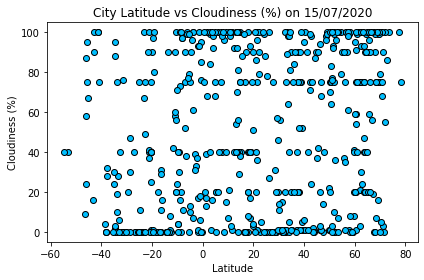

In [12]:
# Generate a scatter plot of latitude versus cloudiness

plt.scatter(humidity_drop["Latitude"], humidity_drop["Cloudiness (%)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Cloudiness (%) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Cloudiness_(%).png")
plt.show()

This code is written to produce a scatter plot showing City Latitude vs Cloudiness on any given day; with the day being shown in the title of the plot. This is automatically updated with the date the code is run. 

The plot above shows no real correlation in regards to latitude and cloudiness for each city; however we can see some clustering of data around most of our measurements in the plot (0%, 20%, 40%, 80% and 100%) - which shows that no matter the location, the cloudiness in cities generally falls around these centralised readings.

## Latitude vs. Wind Speed Plot

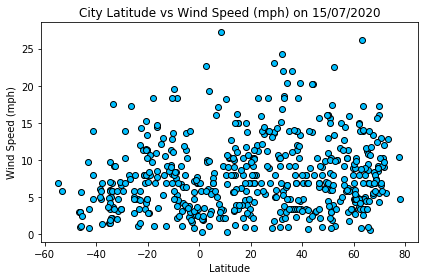

In [13]:
# Generate a scatter plot of latitude versus wind speed

plt.scatter(humidity_drop["Latitude"], humidity_drop["Wind Speed (mph)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Wind Speed (mph) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed_(mph).png")
plt.show()

This code is written to produce a scatter plot showing City Latitude vs Wind Speed (mph) on any given day; with the day being shown in the title of the plot. This is automatically updated with the date the code is run.

The plot above shows no real correlation in regards to latitude and wind speed for each city; however we do see clustering of data around the 5 - 10 mph wind speed across all locations, telling us that the majority of locations all some form of wind recorded today, we can see there are a few outliers around the 25 - 30 mph range, however these are quite plausible for wind readings, especially south of the equator.

## Linear Regression

In [14]:
# Create Northern Hemisphere Data Frames
northern = humidity_drop.loc[humidity_drop["Latitude"]>=0]
northern

,City,Country,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ust-Tsilma,RU,56.37,65.44,52.15,70,100,8.72
3,Margate,GB,65.66,51.38,1.39,64,93,3.00
5,Nanga Eboko,CM,75.96,4.68,12.37,85,68,3.18
6,Tigil',RU,54.91,57.80,158.67,96,99,6.22
9,Clyde River,CA,52.48,70.47,-68.59,64,100,6.71
...,...,...,...,...,...,...,...,...
555,Aykhal,RU,71.60,66.00,111.50,43,20,4.47
556,Wanning,CN,82.15,18.80,110.40,84,93,10.67
558,Puerto Carreño,CO,77.00,6.19,-67.49,88,20,5.82
559,Chegdomyn,RU,64.78,51.12,133.02,90,100,0.83


In [15]:
# Create Southern Hemisphere Data Frames
southern = humidity_drop.loc[humidity_drop["Latitude"]<0]
southern

,City,Country,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Hithadhoo,MV,84.85,-0.60,73.08,70,85,6.91
2,Busselton,AU,55.20,-33.65,115.33,82,75,17.52
4,Rondonópolis,BR,89.49,-16.47,-54.64,29,11,7.70
7,Pisco,PE,59.00,-13.70,-76.22,93,90,8.05
8,Chimbote,PE,64.54,-9.09,-78.58,80,73,8.41
...,...,...,...,...,...,...,...,...
527,Saldanha,ZA,62.60,-33.01,17.94,42,0,3.36
528,Constitución,CL,55.33,-35.33,-72.42,67,0,3.69
543,Ilebo,CD,89.13,-4.32,20.58,41,96,3.49
557,Nelson Bay,AU,52.48,-32.72,152.15,71,40,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Temperature (f) and Latitude is -0.73



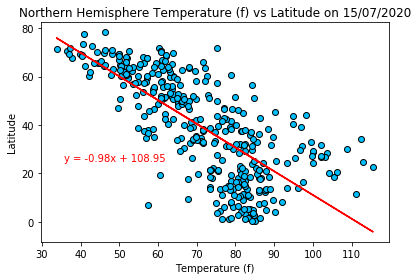

In [16]:
# Generate a scatter plot of Northern Hemisphere Temp versus Latitude

plt.scatter(northern["Temperature (f)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Temperature (f)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Temperature (f) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Temperature (f)"], northern["Latitude"])
regress_values = (northern["Temperature (f)"]) * slope + intercept

plt.plot((northern["Temperature (f)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(35.8,25, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Temperature (f)"], northern["Latitude"])
print(f"\nThe correlation between Temperature (f) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northern_Hemisphere_Temperature_(f)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Temperature (f) and Latitude is 0.84



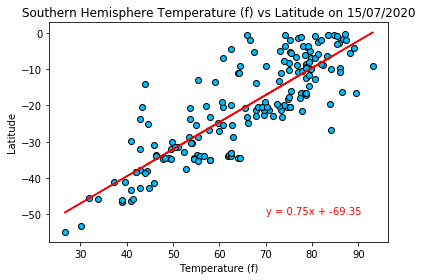

In [17]:
# Generate a scatter plot of Southern Hemisphere Temp versus Latitude

plt.scatter(southern["Temperature (f)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Temperature (f)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Temperature (f) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Temperature (f)"], southern["Latitude"])
regress_values = (southern["Temperature (f)"]) * slope + intercept

plt.plot((southern["Temperature (f)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(70,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Temperature (f)"], southern["Latitude"])
print(f"\nThe correlation between Temperature (f) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Temperature_(f)_vs_Latitude.png")
plt.show()

##  Max Temp vs. Latitude Linear Regression 
Both of the above plots for temperatue vs latitude in the Northern and Southern Hemisphere are showing that the closer you get to the equator (0° latitude) the hotter the temperature. 
This is shown by the strong positive correlation between latitude and temperature in the Southern Hemisphere and the strong negative correlation in the Northen Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Humidity (%) and Latitude is 0.14



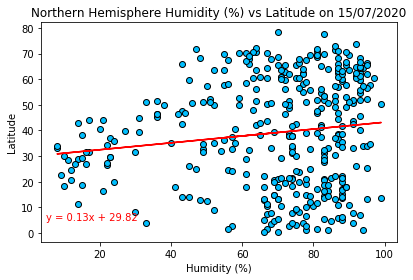

In [18]:
# Generate a scatter plot of Northern Hemisphere Humidity versus Latitude

plt.scatter(northern["Humidity (%)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Humidity (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Humidity (%)"], northern["Latitude"])
regress_values = (northern["Humidity (%)"]) * slope + intercept

plt.plot((northern["Humidity (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(5,5, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Humidity (%)"], northern["Latitude"])
print(f"\nThe correlation between Humidity (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northern_Hemisphere_Humidity_(%)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Humidity (%) and Latitude is -0.0



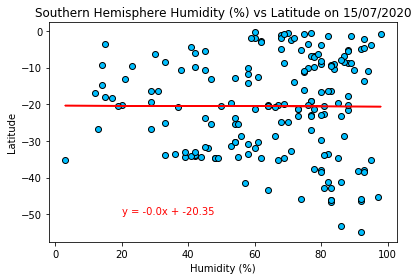

In [19]:
# Generate a scatter plot of Southern Hemisphere Humidity versus Latitude

plt.scatter(southern["Humidity (%)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Humidity (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Humidity (%)"], southern["Latitude"])
regress_values = (southern["Humidity (%)"]) * slope + intercept

plt.plot((southern["Humidity (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Humidity (%)"], southern["Latitude"])
print(f"\nThe correlation between Humidity (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Humidity_(%)_vs_Latitude.png")
plt.show()

## Humidity (%) vs. Latitude Linear Regression
Both of the above plots for Humidity vs Latitude in the Northern and Southern Hemisphere show almost no correlation between the two elements, regardless of location. This tells us that it doesn't matter where in the world you are, it has no direct relationship as to how humid it will or will not be. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Cloudiness (%) and Latitude is 0.12



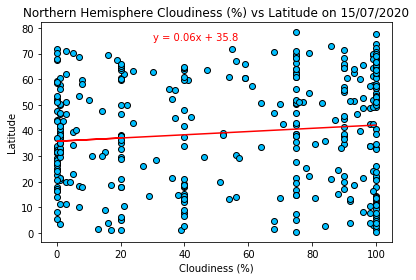

In [20]:
# Generate a scatter plot of Northern Hemisphere Cloudiness versus Latitude

plt.scatter(northern["Cloudiness (%)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Cloudiness (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Cloudiness (%)"], northern["Latitude"])
regress_values = (northern["Cloudiness (%)"]) * slope + intercept

plt.plot((northern["Cloudiness (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(30,75, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Cloudiness (%)"], northern["Latitude"])
print(f"\nThe correlation between Cloudiness (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northen_Hemisphere_Cloudiness_(%)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Cloudiness (%) and Latitude is 0.16



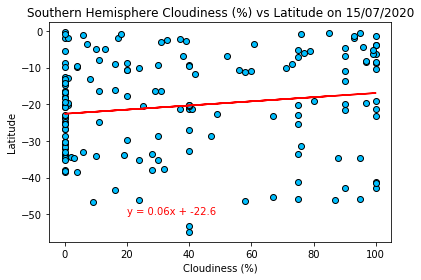

In [21]:
# Generate a scatter plot of Southern Hemisphere Cloudiness versus Latitude

plt.scatter(southern["Cloudiness (%)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Cloudiness (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Cloudiness (%)"], southern["Latitude"])
regress_values = (southern["Cloudiness (%)"]) * slope + intercept

plt.plot((southern["Cloudiness (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Cloudiness (%)"], southern["Latitude"])
print(f"\nThe correlation between Cloudiness (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Cloudiness_(%)_vs_Latitude.png")
plt.show()

## Cloudiness (%) vs. Latitude Linear Regression
Both of the above plots for Cloudiness vs Latitude in the Northern and Southern Hemisphere show little to no correlation between the two elements, regardless of location. This tells us that it doesn't matter where in the world you are, it has no direct relationship as to how cloudy it will or will not be. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Wind Speed (mph) and Latitude is 0.02



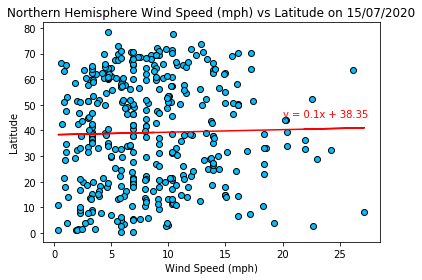

In [22]:
# Generate a scatter plot of Northern Hemisphere Wind Speed versus Latitude

plt.scatter(northern["Wind Speed (mph)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Wind Speed (mph) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Wind Speed (mph)"], northern["Latitude"])
regress_values = (northern["Wind Speed (mph)"]) * slope + intercept

plt.plot((northern["Wind Speed (mph)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,45, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Wind Speed (mph)"], northern["Latitude"])
print(f"\nThe correlation between Wind Speed (mph) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northen_Hemisphere_Wind_Speed_(mph)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Wind Speed (mph) and Latitude is 0.15



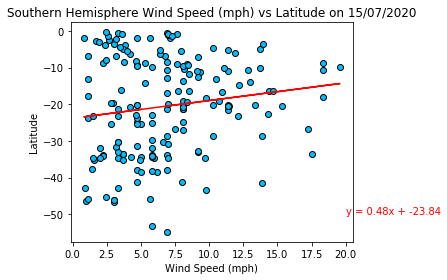

In [23]:
# Generate a scatter plot of Southern Hemisphere Wind Speed versus Latitude

plt.scatter(southern["Wind Speed (mph)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Wind Speed (mph) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Wind Speed (mph)"], southern["Latitude"])
regress_values = (southern["Wind Speed (mph)"]) * slope + intercept

plt.plot((southern["Wind Speed (mph)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Wind Speed (mph)"], southern["Latitude"])
print(f"\nThe correlation between Wind Speed (mph) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_(mph)_vs_Latitude.png")
plt.show()

## Wind Speed (mph) (%) vs. Latitude Linear Regression
Both of the above plots for Wind Speed vs Latitude in the Northern and Southern Hemisphere show little to no correlation between the two elements, regardless of location. This tells us that it doesn't matter where in the world you are, it has no direct relationship as to how windy it will or will not be.